<a href="https://colab.research.google.com/github/WasudeoGurjalwar/AL_ML_Assignments/blob/main/Linear_Regression_on_IMD_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [6]:
data = pd.read_csv('IMD_Proceesed_Data_Train_v01.csv', index_col=0)
data.head()

,day,month,year,lat,lon,pos,rain,tmin,tmax
time,,,,,,,,,
2000-01-01,0.0,1.0,2000.0,16.5,73.5,"(16.5, 73.5)",2.239058,18.340000,30.950001
2000-01-03,2.0,1.0,2000.0,25.5,86.5,"(25.5, 86.5)",0.931929,8.860000,21.620001
2000-01-04,3.0,1.0,2000.0,9.5,78.5,"(9.5, 78.5)",0.183486,20.650000,26.969999
2000-01-05,4.0,1.0,2000.0,12.5,79.5,"(12.5, 79.5)",0.380458,20.270000,29.010000
2000-01-06,5.0,1.0,2000.0,9.5,78.5,"(9.5, 78.5)",3.853210,21.379999,28.930000


In [8]:
# print the shape of the DataFrame
data.shape

(133509, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133509 entries, 2000-01-01 to 2
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   day     133508 non-null  float64
 1   month   133508 non-null  float64
 2   year    133508 non-null  float64
 3   lat     133508 non-null  float64
 4   lon     133508 non-null  float64
 5   pos     133508 non-null  object 
 6   rain    133508 non-null  float64
 7   tmin    133508 non-null  float64
 8   tmax    133508 non-null  float64
dtypes: float64(8), object(1)
memory usage: 10.2+ MB


In [9]:
data.isnull().sum()

,0
day,1
month,1
year,1
lat,1
lon,1
pos,1
rain,1
tmin,1
tmax,1


<Axes: xlabel='tmax', ylabel='rain'>

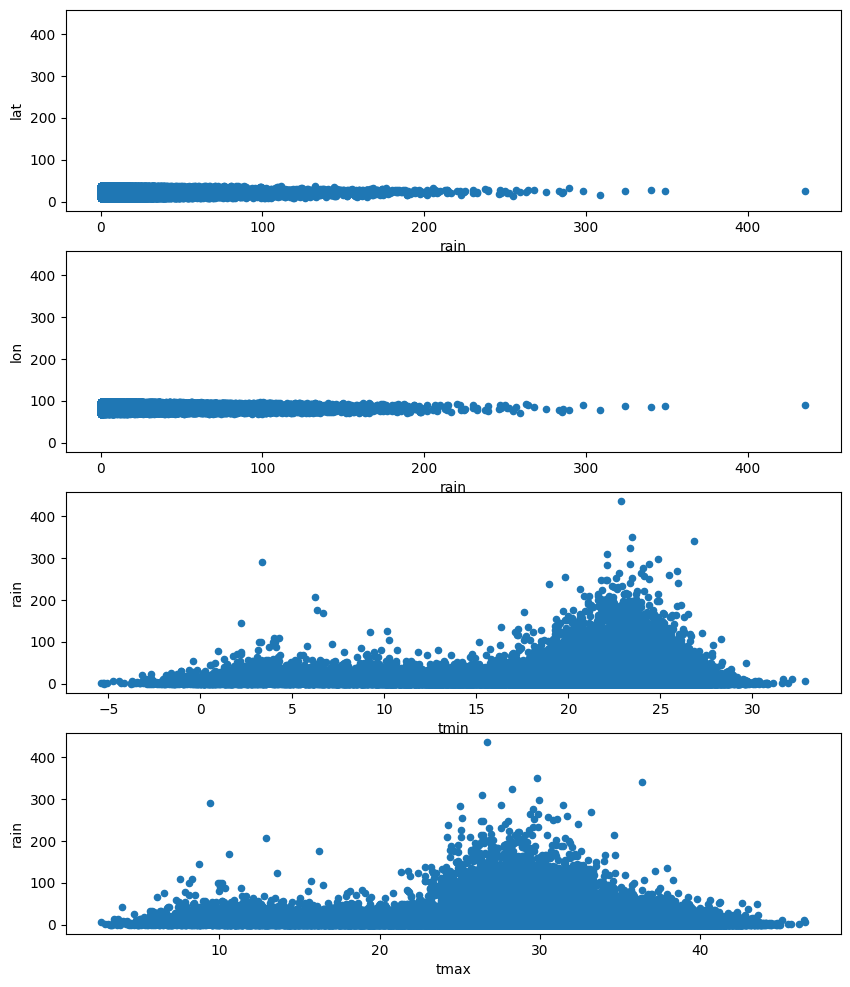

In [10]:
fig, axs = plt.subplots(4, 1, sharey=True)
data.plot(kind='scatter', x='rain', y='lat', ax=axs[0], figsize=(10, 12))
data.plot(kind='scatter', x='rain', y='lon', ax=axs[1])
data.plot(kind='scatter', x='tmin', y='rain', ax=axs[2])
data.plot(kind='scatter', x='tmax', y='rain', ax=axs[3])


In [11]:
loc = data.loc[(data['pos'] == "(15.5, 75.5)") & (data['month'] == 7) ]
x = loc['tmax']
x.drop(columns=['tmax'])
y = loc['rain']
y.head()


,rain
time,
2000-07-01,0.311371
2000-07-02,3.192847
2000-07-03,0.376137
2000-07-04,0.627240
2000-07-05,0.393335


In [12]:
x.shape, y.shape

((75,), (75,))

[]

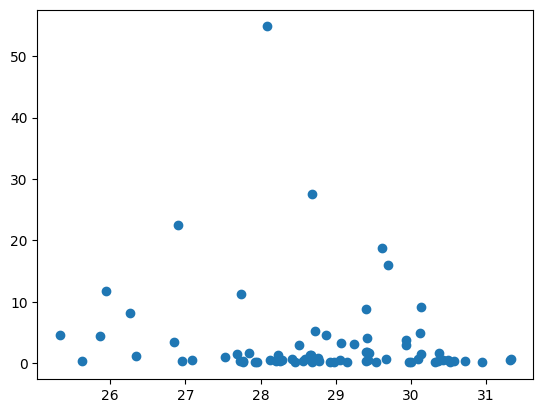

In [13]:
plt.scatter(x, y)
plt.plot()

In [14]:
import numpy as np # linear algebra
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
model.fit(x, y)

LinearRegression()

In [15]:
b = model.intercept_
m = model.coef_

[]

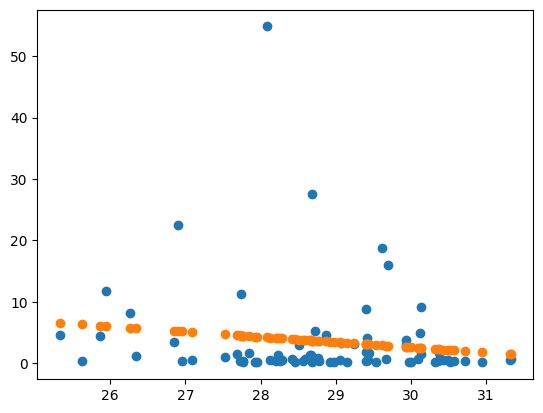

In [16]:
plt.scatter(x, y)
plt.scatter(x, m*x+b)
plt.plot()

In [17]:
loc = data.loc[(data['pos'] == "(15.5, 75.5)") ]
x = loc['tmin']
x.drop(columns=['tmin'])
y = loc['rain']
y.head()


,rain
time,
2000-01-13,0.266301
2000-01-14,1.341953
2000-02-27,12.974209
2000-04-19,0.296274
2000-04-20,0.179321


[]

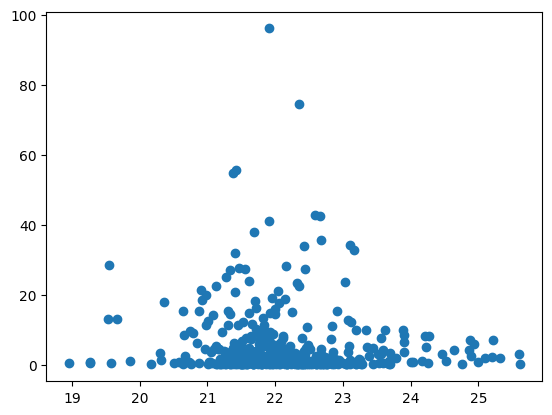

In [18]:
plt.scatter(x, y)
plt.plot()

In [19]:
model2 = LinearRegression()
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
model.fit(x, y)

LinearRegression()

In [21]:
b = model.intercept_
m = model.coef_

[]

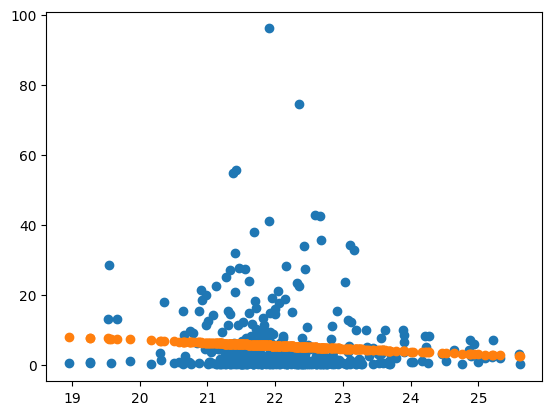

In [22]:
plt.scatter(x, y)
plt.scatter(x, m*x+b)
plt.plot()

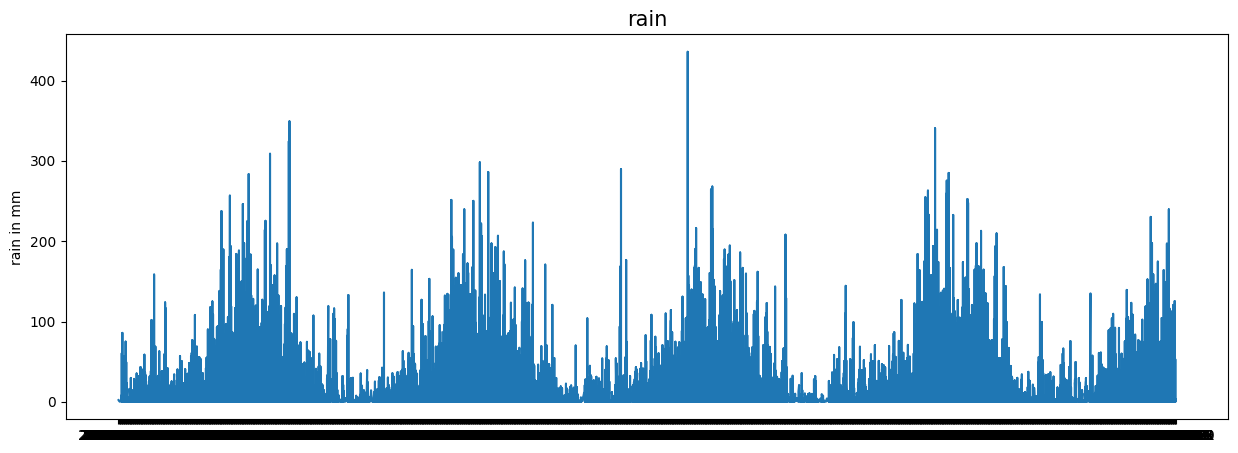

In [23]:
plt.figure(figsize=(15,5))
plt.plot(data['rain'])
plt.title('rain', fontsize=15)
plt.ylabel('rain in mm')
plt.show()

<ipython-input-27-20b65e767b50>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
<ipython-input-27-20b65e767b50>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
<ipython-input-27-20b65e767b50>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

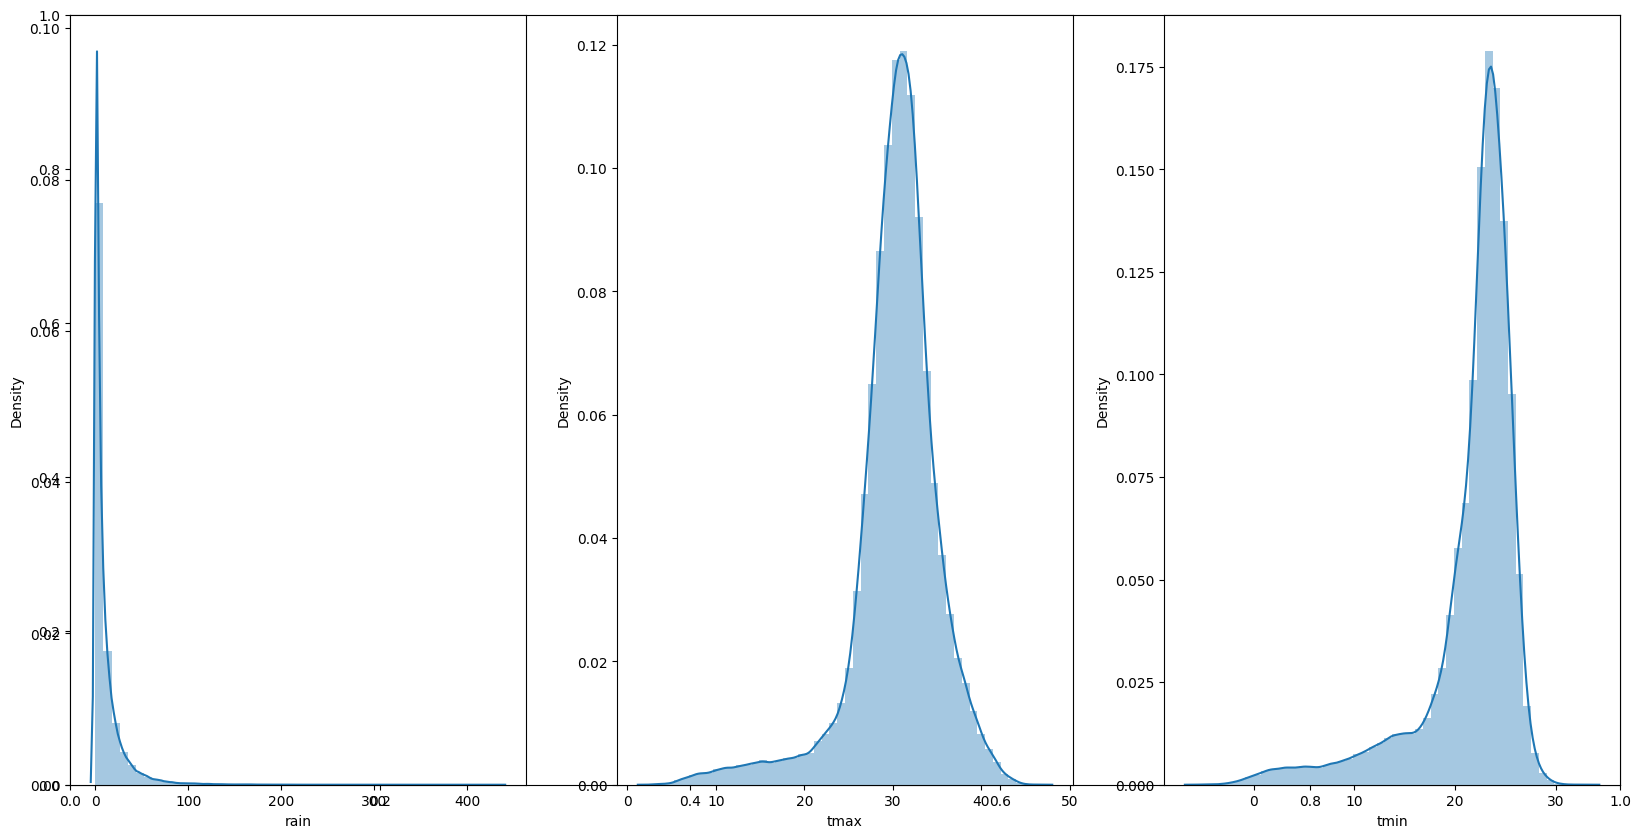

In [27]:
import seaborn as sb
features = ['rain', 'tmax', 'tmin']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(1,3,i+1)
  sb.displot(data[col])
plt.show()